In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
# sns.set(font='SimHei',style="white")  # 解决Seaborn中文显示问题


In [192]:
file_list = os.listdir()
for f in file_list:
    if '.csv' in f:
        source_file = f
        break

In [193]:
source_data = pd.read_csv(source_file)
source_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [194]:
col_map = {'fixed acidity': '固定酸',
           'volatile acidity': '挥发性酸',
           'citric acid': '柠檬酸',
           'residual sugar': '残留糖分',
           'chlorides': '氯化物',
           'free sulfur dioxide': '游离二氧化硫',
           'total sulfur dioxide': '总二氧化硫',
           'density': '浓厚度',
           'pH': '氢离子浓度',
           'sulphates': '硫酸盐',
           'alcohol': '酒精度',
           'quality': '质量'}

source_data.rename(columns=col_map, inplace=True)

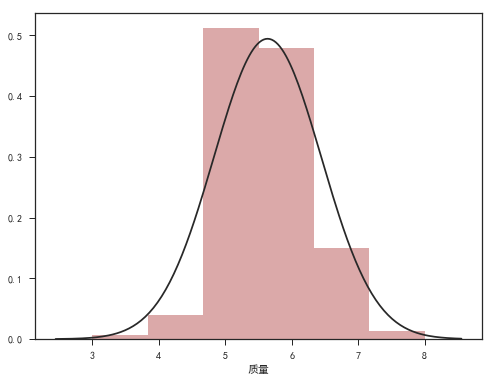

In [215]:
fig,ax1 = plt.subplots(figsize=(8,6))
sns.distplot(source_data['质量'], color="#A52A2A",bins=6,kde= False,fit=norm)

In [196]:
# 选出高质量红葡萄酒 high-quality
hq_data = source_data#[source_data['质量'].isin([5,6])]

source_data.describe()

,固定酸,挥发性酸,柠檬酸,残留糖分,氯化物,游离二氧化硫,总二氧化硫,浓厚度,氢离子浓度,硫酸盐,酒精度,质量
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [197]:
# 皮尔森相关系数 前提是要数据正态分布
# abs(r) < 0.3 不相关
# 0 <= abs(r) <= 0.3 低相关
# 0.3 < abs(r) <= 0.8 中相关
# 0.8 < abs(r) <= 1 高相关
hq_data_corr = hq_data.corr(method = 'pearson', min_periods = 1)

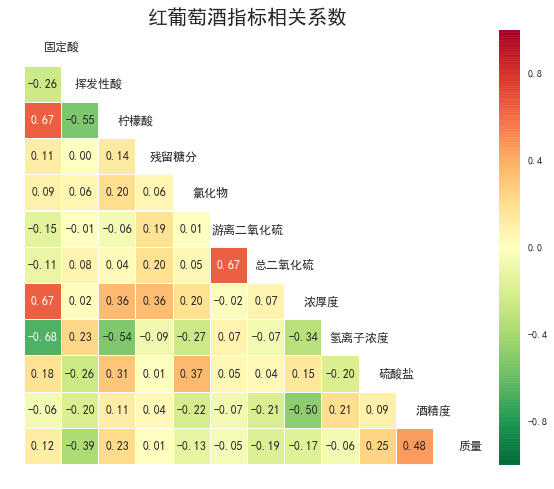

In [198]:
sns.set(font='SimHei',style="white")  # 解决Seaborn中文显示问题
f, ax= plt.subplots(figsize = (10,8))
ax.set_title('红葡萄酒指标相关系数',fontsize=20)
ax.axis('off') # 关闭标签

mask = np.zeros_like(hq_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(hq_data_corr, 
            cmap= 'RdYlGn_r', # 末尾加r是颜色取反 
            linewidths = 0.05, 
            mask = mask,
            alpha = 0.95,
            annot = True,
            center=0,
            fmt = '.2f',
            vmin = -1,
            vmax = 1
#             ax = ax,
#             xticklabels=False,
#             yticklabels=False,
           )


for i in range(len(hq_data_corr)):
    ax.text(i+1,(i+0.5), hq_data_corr.columns[i], 
            ha="center", va="center", rotation=0)
#     for j in range(i+1, len(hq_data_corr)):
#         s = "{:.2f}".format(hq_data_corr.values[i,j])
#         ax.text(j+0.5,len(hq_data_corr)-(i+0.5),s, 
#             ha="center", va="center")
        

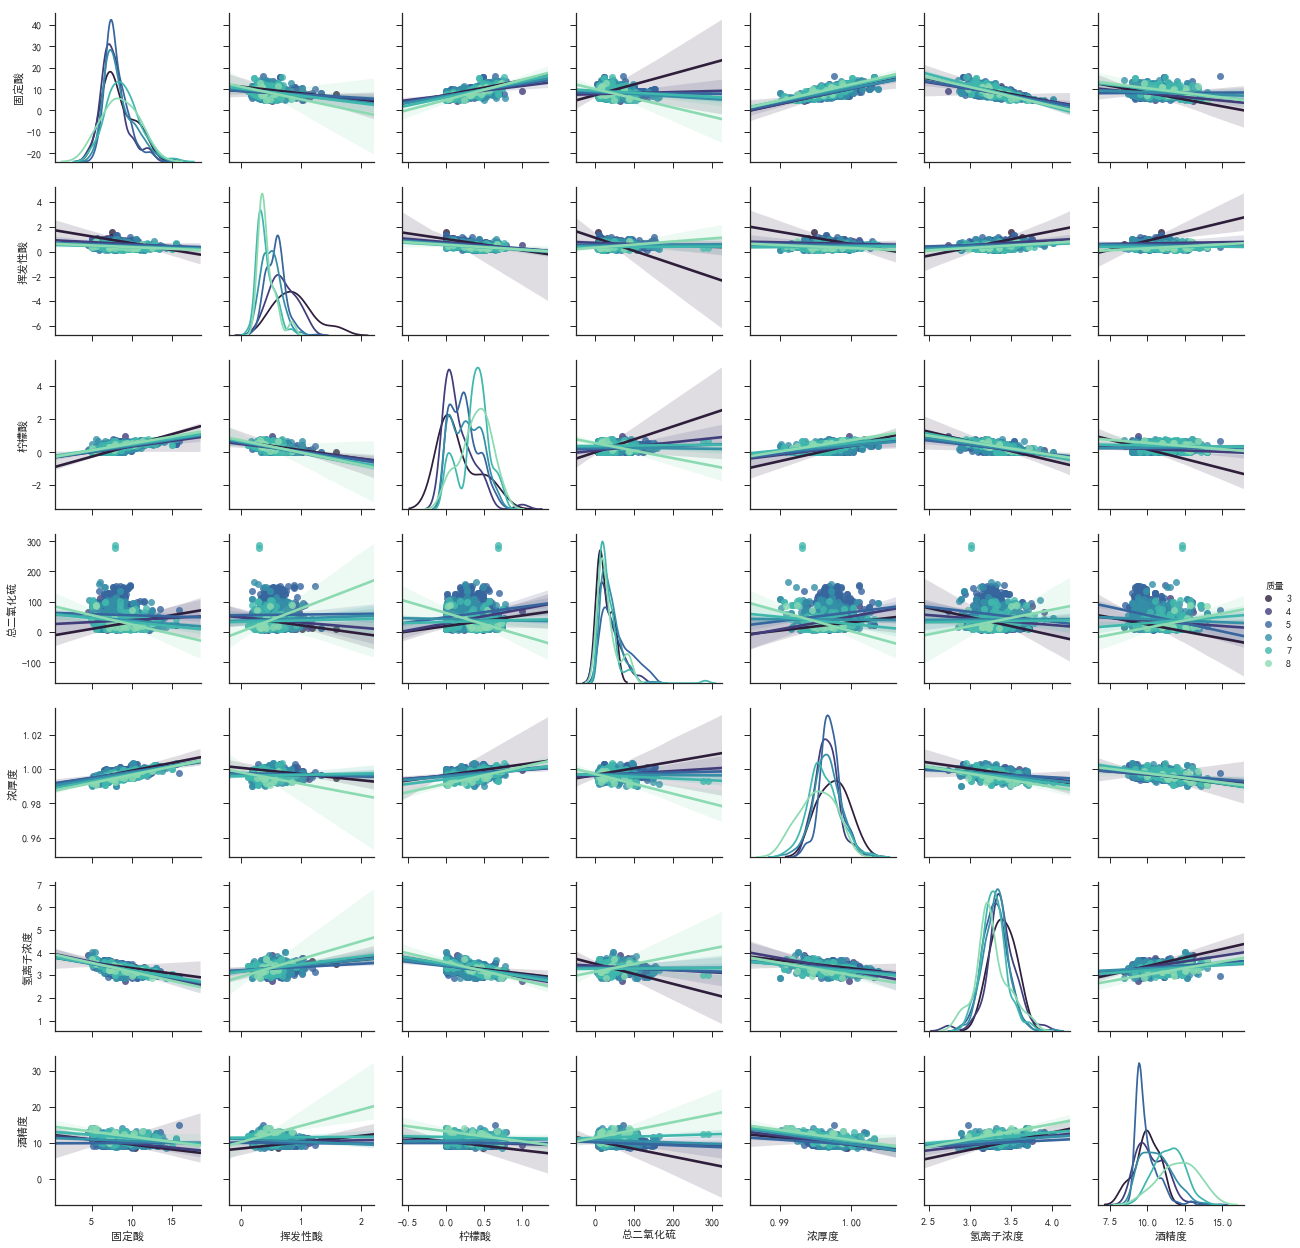

In [205]:
sns.set(font='SimHei',style="ticks") # 解决Seaborn中文显示问题
cols = hq_data.columns.tolist()
remove_cols = ['质量','硫酸盐','游离二氧化硫','氯化物','残留糖分']
temp_cols = [_ for _ in cols if _ not in remove_cols]

sns.pairplot(hq_data
             ,vars = temp_cols
             ,kind="reg" # 回归线
             ,diag_kind="kde" # 对角线数据分布 
             ,hue="质量" # 分类
             ,palette='mako',
            )

In [ ]:
https://blog.csdn.net/X_dmword/article/details/80377213